In [1]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
clearall()

In [40]:
print('Importing Librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
%matplotlib inline
import time
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
print('Librairies imported')

___Author___='LumberJack Jyss'
print(" Fin'Lab Depedencies",Fore.BLUE,
      '\n Global Optimized LumberJack Environment Motor',Style.RESET_ALL,'\n GOLEM 55 \n LumberJack Jyss 5779(c)')
print(Fore.BLUE,'°0Oo_D.A.G._26_oO0°',Style.RESET_ALL)
print(" INVESTING.COM'S COMMUNITY SENTIMENTS v1.10")
print('')

Importing Librairies...
Librairies imported
 Fin'Lab Depedencies  
 Global Optimized LumberJack Environment Motor  
 GOLEM 55 
 LumberJack Jyss 5779(c)
 °0Oo_D.A.G._26_oO0° 
 INVESTING.COM'S COMMUNITY SENTIMENTS v1.10



In [3]:
try :
    sentiments_2018 = pd.read_csv('sentiments_2018.csv')
    compteur = pd.read_csv('compteur.csv')
    compteur = compteur.drop('Unnamed: 0',axis=1)
    sentiments_2018 = sentiments_2018.drop('Unnamed: 0',axis=1)

                        
except:

    sentiments = pd.read_csv('prepared_data.csv')
    sentiments = sentiments.drop('Unnamed: 0',axis=1)
    sentiments = sentiments.sort_values('Date')
    compteur = pd.read_csv('compteur.csv')
    compteur = compteur.drop('Unnamed: 0',axis=1)

    print(sentiments.iloc[18423,1][:4],sentiments.iloc[119263,1][:4])

    print(len(sentiments.Symbol.unique()))


    USER_ID = []
    DATE = []
    SYMBOL = []
    NAME = []
    SENTIMENT = []
    for i in range(18423,119263):
        print('\r Loop : ',i,'/119263',end='',flush=True)
        if sentiments.iloc[i,1][:4] == '2018':
            USER_ID.append(sentiments.iloc[i,0])
            DATE.append(sentiments.iloc[i,1])
            SYMBOL.append(sentiments.iloc[i,2])
            NAME.append(sentiments.iloc[i,3])
            SENTIMENT.append(sentiments.iloc[i,4])

    sentiments_2018 = pd.DataFrame()
    sentiments_2018['User ID'] = USER_ID
    sentiments_2018['Date'] = DATE
    sentiments_2018['Symbol'] = SYMBOL
    sentiments_2018['Name'] = NAME
    sentiments_2018['Sentiments'] = SENTIMENT

    sentiments_2018 = sentiments_2018.sort_values('User ID')

    print(len(sentiments_2018.Symbol.unique()))

    sentiments_2018.to_csv('sentiments_2018.csv')

In [4]:
tmps1=time.time()
try:
    megabase = pd.read_csv('megabase.csv')
except:
    megabase = pd.DataFrame()
    infrabase = pd.DataFrame()
    for boo in range(0,compteur.shape[0]):
        stock = compteur.iloc[boo,0]
        try:
            infrabase = web.DataReader(stock, 'yahoo', '2018-01-01', '2019-02-28')
            tempo = infrabase['Adj Close']
            infrabase = infrabase.drop(['Adj Close'],axis=1)
            infrabase['Stock'] = stock
            infrabase['Adj Close'] = tempo
            infrabase['Adj Close Shift_22'] = tempo.shift(-22)
            infrabase['% Evolution'] = (((infrabase['Adj Close Shift_22'] - infrabase['Adj Close'])/infrabase['Adj Close'])*100)
            infrabase = infrabase.dropna()

            megabase = pd.concat((megabase,infrabase))
        except:
            print(Fore.RED,'Problème avec le ticker ',stock,Style.RESET_ALL)
            continue
    megabase.to_csv('megabase.csv')
tmps2=round(time.time()-tmps1,2)
print ("Job done in = %f" %tmps2,'seconds')

Job done in = 0.280000 seconds


In [11]:
megabase.head()

Date        High         Low        Open       Close     Volume  \
0  2018-01-02  237.070007  232.809998  235.779999  235.639999  2931000.0   
1  2018-01-03  235.729996  233.289993  235.070007  235.630005  2193700.0   
2  2018-01-04  239.440002  236.470001  237.000000  238.710007  2243100.0   
3  2018-01-05  240.899994  237.740005  238.649994  240.570007  1835900.0   
4  2018-01-08  240.940002  239.179993  239.380005  239.789993  1869000.0   

  Stock   Adj Close  Adj Close Shift_22  % Evolution  
0   MMM  223.990814          233.049698     4.044310  
1   MMM  223.981308          219.998459    -1.778206  
2   MMM  226.909073          222.080185    -2.128116  
3   MMM  228.677124          221.661942    -3.067724  
4   MMM  227.935654          211.871140    -7.047829

In [12]:
sentiments_2018.head()

User ID        Date Symbol            Name  Sentiments
0  43939137285  2018-03-22     FB    Facebook Inc           0
1  43939137285  2018-03-21     FB    Facebook Inc           1
2  43939137285  2018-03-21     FB    Facebook Inc           0
3  43939137285  2018-03-15   AMZN  Amazon Com Inc           0
4  43939137285  2018-01-10   ANSS           ANSYS           1

In [13]:
len(sentiments_2018['User ID'].unique())
    

33785

In [23]:
tmps1=time.time()
sentiments_USER = pd.DataFrame()
USER = []
SYMBOL = []
EVO = []
DATE = []
RANK = []
sentiments_2018 = sentiments_2018.sort_values('User ID')
for coo in range(1,sentiments_2018.shape[0]):
    try:        
        user = sentiments_2018.iloc[coo,0]
        if user == sentiments_2018.iloc[coo-1,0]:
            stock = sentiments_2018.iloc[coo,2]
            date = sentiments_2018.iloc[coo,1]    
            perf = sentiments_2018.iloc[coo,-1]
            minibase = megabase.loc[megabase['Stock'] == stock]
            midibase = minibase.loc[minibase.Date.isin([date])]
            evo = midibase.iloc[-1,-1]

            if (evo > 10 and perf == 1) or (evo < -10 and perf == 0):
                rank = 1
            else :
                rank = 0

            USER.append(user)
            DATE.append(date)
            SYMBOL.append(stock)
            EVO.append(evo)
            RANK.append(rank)

    except:
        continue

sentiments_USER['User'] = USER
sentiments_USER['Date'] = DATE
sentiments_USER['Symbol'] = SYMBOL
sentiments_USER['Evolution'] = EVO
sentiments_USER['Rank'] = RANK
print('Terminé!!!!!!!')
tmps2=round(time.time()-tmps1,2)
print ("Job done in = %f" %tmps2,'seconds')
sentiments_USER.to_csv('sentiments_USER')

Terminé!!!!!!!
Job done in = 567.010000 seconds


In [29]:
sentiments_USER.sort_values('User').head()

In [25]:
sentiments_USER.shape

(60684, 5)

In [26]:
sentiments_USER['Rank'].sum()

7395

In [30]:
tmps1=time.time()
USER = []
RANK = []
sumt = 0
a = 0
ranking = pd.DataFrame()
sentiments_USER = sentiments_USER.sort_values('User')
for doo in range(1,sentiments_USER.shape[0]):
    user = sentiments_USER.iloc[doo,0]
    
    if user == sentiments_USER.iloc[doo-1,0]:
        sumt = sumt + sentiments_USER.iloc[doo-1,-1]
        a += 1
    else:
        if a == 0:
            rank = 0
        else:
            rank = (sumt/a)*100
        USER.append(user)
        RANK.append(rank)
        sumt = 0
        a = 0
ranking['User'] = USER
ranking['Rank'] = RANK
tmps2=round(time.time()-tmps1,2)
print ("Job done in = %f" %tmps2,'seconds')
ranking.to_csv('ranking.csv')

Job done in = 1.540000 seconds


In [37]:
ranking.head()

User       Rank
0  43939972920  14.285714
1  43941953475  20.000000
2  43942528545  13.157895
3  43942538115   0.000000
4  43943852685  17.647059

In [38]:
ranking.shape

(14222, 2)

In [39]:
len(ranking.User.unique())

14222

In [42]:
ranking.head()

User       Rank
0  43939972920  14.285714
1  43941953475  20.000000
2  43942528545  13.157895
3  43942538115   0.000000
4  43943852685  17.647059

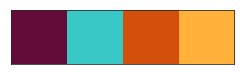

In [41]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [72]:
LABEL = []
for loo in range(0,ranking.shape[0]):
    if ranking.iloc[loo,1] < 25:
        LABEL.append('< 25')
    elif ranking.iloc[loo,1] < 50 and ranking.iloc[loo,1] >= 25:
        LABEL.append('< 50')
    elif ranking.iloc[loo,1] < 75 and ranking.iloc[loo,1] >= 50:
        LABEL.append('< 75')
    elif ranking.iloc[loo,1] >= 75:
        LABEL.append('>= 75')

In [73]:
len(LABEL),len(ranking)

(14222, 14222)

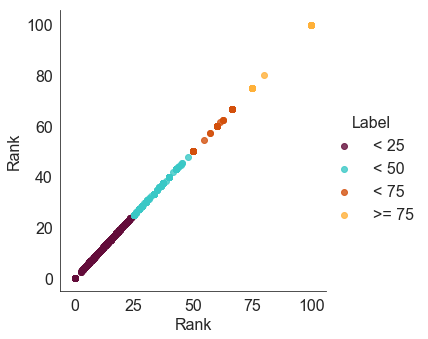

In [96]:
ranking['Label'] = LABEL
facet = sns.lmplot(data=ranking.sort_values('Label'), x='Rank', y='Rank',hue='Label', 
                   fit_reg=False, legend=True, legend_out=True)

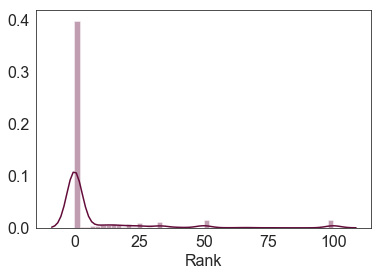

In [105]:
sns.distplot(ranking['Rank'])

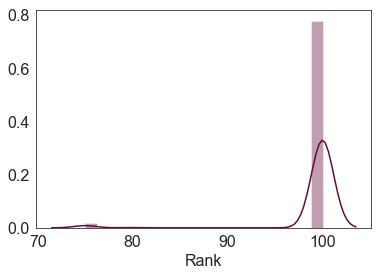

In [106]:
sns.distplot(ranking['Rank'].loc[ranking['Label']=='>= 75'])

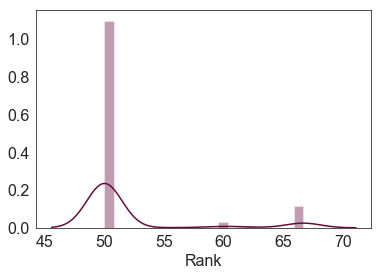

In [107]:
sns.distplot(ranking['Rank'].loc[ranking['Label']=='< 75'])

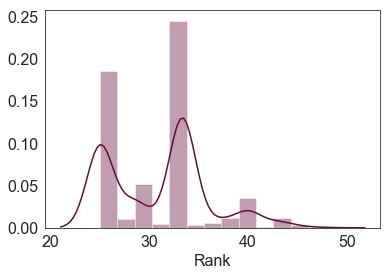

In [109]:
sns.distplot(ranking['Rank'].loc[ranking['Label']=='< 50'])

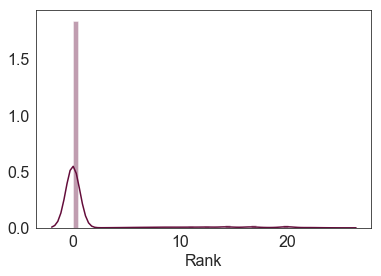

In [110]:
sns.distplot(ranking['Rank'].loc[ranking['Label']=='< 25'])

In [99]:
from collections import Counter
Counter(ranking['Label'])

Counter({'< 25': 12564, '< 50': 767, '< 75': 473, '>= 75': 418})

In [93]:
ranking.head()

User       Rank Label
0  43939972920  14.285714  < 25
1  43941953475  20.000000  < 25
2  43942528545  13.157895  < 25
3  43942538115   0.000000  < 25
4  43943852685  17.647059  < 25

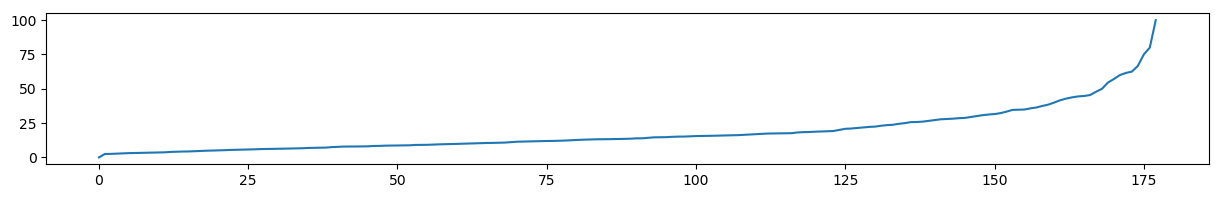

In [35]:
plt.figure(figsize=(15,2),dpi=100)
plt.plot(ranking.Rank.sort_values().unique())

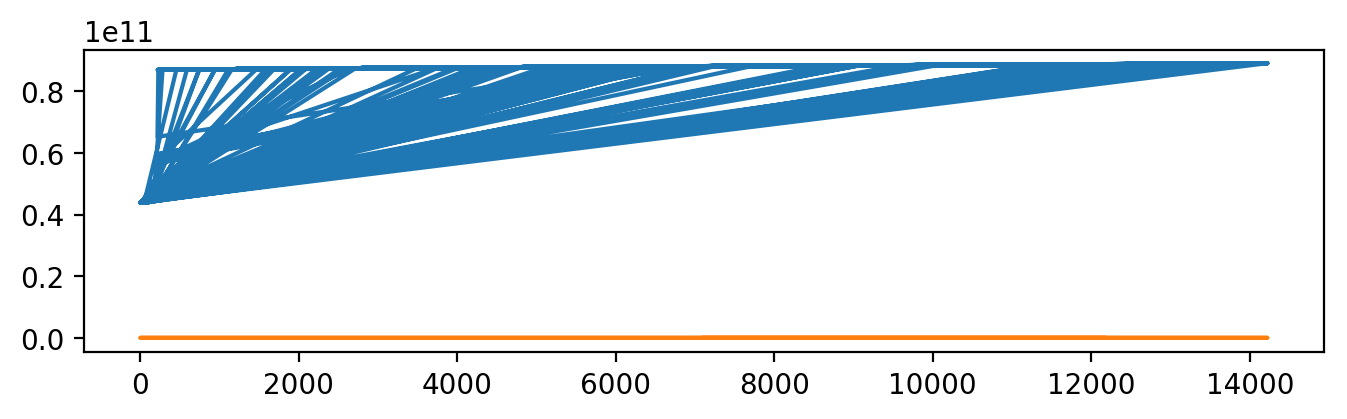

In [68]:
plt.figure(figsize=(8,2),dpi=200)
plt.plot(ranking.sort_values('Rank'))